In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import json

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

params = json.loads(open('params.json', 'r').read())

# Date range
start = params["start_date"]
end = params["end_date"]

# Tickers of assets
industry_asset = json.loads(open('stocks.json', 'r').read())
assets = []
for key, values in industry_asset.items():
    for value in values:
        assets.append(value)

# Downloading data
data = yf.download(assets, start = start, end = end)

data = data.loc[:,('Adj Close', slice(None))]

data.columns = assets


[*********************100%%**********************]  23 of 23 completed


In [2]:
# Calculating returns
Y = data[assets].pct_change().dropna()

display(Y.tail())

,TIMS3.SA,VIVT3.SA,SUZB3.SA,KLBN11.SA,CSAN3.SA,VBBR3.SA,PRIO3.SA,UGPA3.SA,ENAT3.SA,PETR3.SA,...,ALUP11.SA,CPFE3.SA,CMIG3.SA,ELET3.SA,EQTL3.SA,EGIE3.SA,VALE3.SA,GGBR3.SA,CSNA3.SA,FESA4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-27,-1.3291%,-2.4167%,-0.9177%,-2.0808%,0.7086%,-1.0401%,-2.1925%,-0.4348%,-1.5756%,-2.4152%,...,-0.9009%,-0.7224%,-0.4792%,-1.4988%,-1.0201%,-2.7326%,-2.5238%,3.4763%,-2.9014%,-2.8454%
2023-10-30,-0.4254%,1.5395%,-1.2549%,-2.1875%,1.1434%,-1.5515%,0.0000%,-2.0742%,-1.5582%,-2.0677%,...,-0.9713%,-0.8056%,-2.9516%,-0.5200%,-0.6184%,0.0669%,-0.3908%,0.9028%,-1.5936%,0.8272%
2023-10-31,-0.3204%,1.5161%,1.1800%,0.6390%,2.2609%,-0.1017%,1.4265%,-2.8428%,1.0624%,1.0877%,...,-0.4651%,-0.8645%,2.8904%,-0.1549%,0.1185%,1.4037%,0.2943%,1.2027%,0.1518%,0.3104%
2023-11-01,0.8214%,7.0130%,1.5251%,5.4603%,1.7857%,2.2646%,3.4443%,2.8112%,2.7033%,2.0886%,...,1.1682%,1.1628%,0.7757%,-0.2327%,0.5919%,4.3507%,3.7164%,1.9130%,1.8191%,5.0619%
2023-11-03,1.5941%,2.1238%,1.7379%,3.3715%,5.8480%,1.6920%,2.3862%,-2.2879%,1.1072%,2.0149%,...,0.8776%,0.8359%,0.2704%,-0.5637%,2.1771%,0.1895%,0.6129%,1.2514%,1.5881%,0.2525%


,TIMS3.SA,VIVT3.SA,SUZB3.SA,KLBN11.SA,CSAN3.SA,VBBR3.SA,PRIO3.SA,UGPA3.SA,ENAT3.SA,PETR3.SA,...,ALUP11.SA,CPFE3.SA,CMIG3.SA,ELET3.SA,EQTL3.SA,EGIE3.SA,VALE3.SA,GGBR3.SA,CSNA3.SA,FESA4.SA
weights,0.0000%,17.1821%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,20.2218%,20.3572%,0.0000%,18.6948%,3.6060%,0.0000%,0.0000%,0.0000%,0.0000%


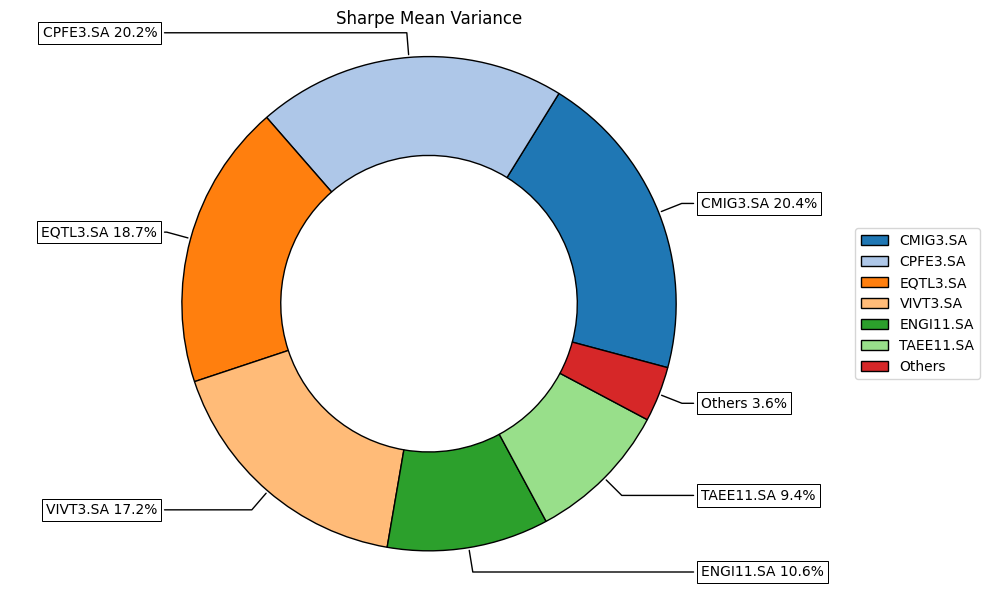

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_sharpe = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_sharpe.T)

# Plotting the composition of the portfolio

ax_sharpe = rp.plot_pie(w=w_sharpe, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

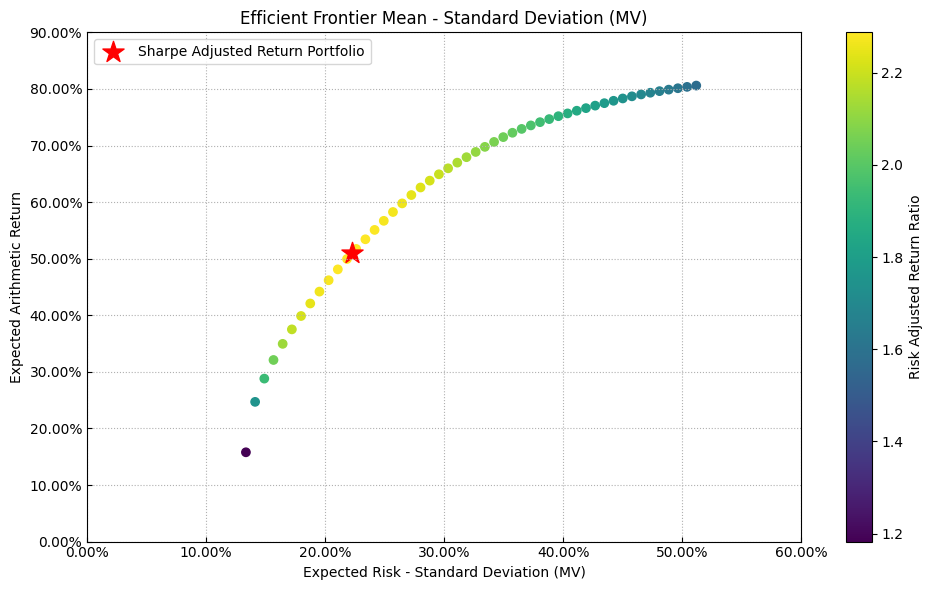

In [4]:
# Plotting frontier

points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
# display(frontier.T.tail())

# Plotting the efficient frontier

label = 'Sharpe Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_sharpe, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


In [5]:
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

In [6]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
TIMS3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
VIVT3.SA,17.18%,4.41%,17.59%,0.00%,18.26%,20.81%,21.13%,25.64%,28.42%,17.05%,24.40%,18.89%,26.59%
SUZB3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.24%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
KLBN11.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CSAN3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
VBBR3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,18.75%,0.00%,4.87%,0.00%,14.30%
PRIO3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
UGPA3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ENAT3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
PETR3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


,TIMS3.SA,VIVT3.SA,SUZB3.SA,KLBN11.SA,CSAN3.SA,VBBR3.SA,PRIO3.SA,UGPA3.SA,ENAT3.SA,PETR3.SA,...,ALUP11.SA,CPFE3.SA,CMIG3.SA,ELET3.SA,EQTL3.SA,EGIE3.SA,VALE3.SA,GGBR3.SA,CSNA3.SA,FESA4.SA
weights,13.2478%,0.0000%,0.0000%,0.0000%,0.0000%,17.4856%,0.0000%,0.0733%,0.0000%,0.0000%,...,7.5836%,1.6364%,0.0000%,9.7942%,22.2288%,3.0826%,0.0000%,8.2238%,0.0000%,13.4101%


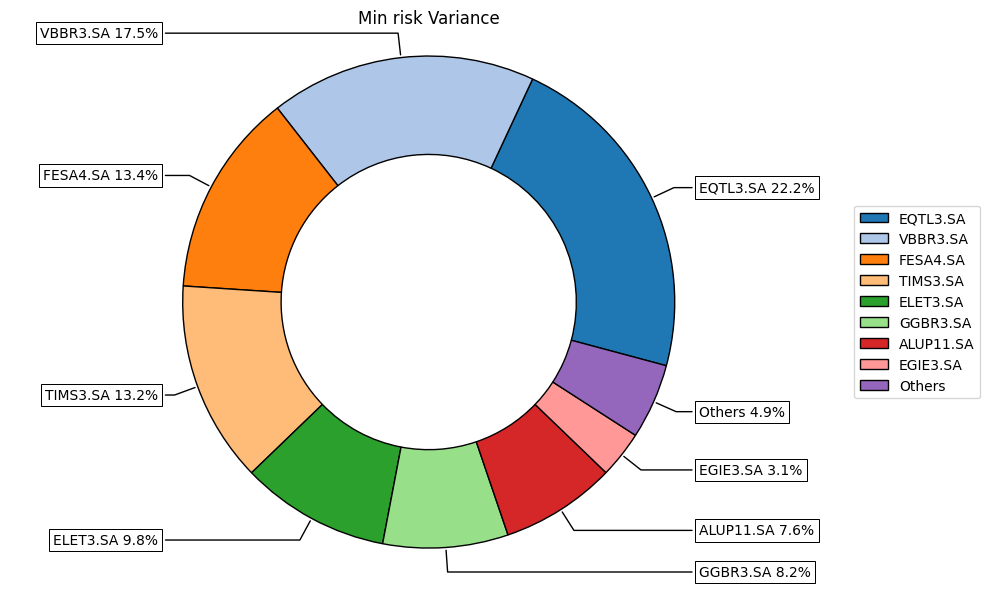

In [7]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_min_risk = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_min_risk.T)


# Plotting the composition of the portfolio

ax_min_risk = rp.plot_pie(w=w_min_risk, title='Min risk Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

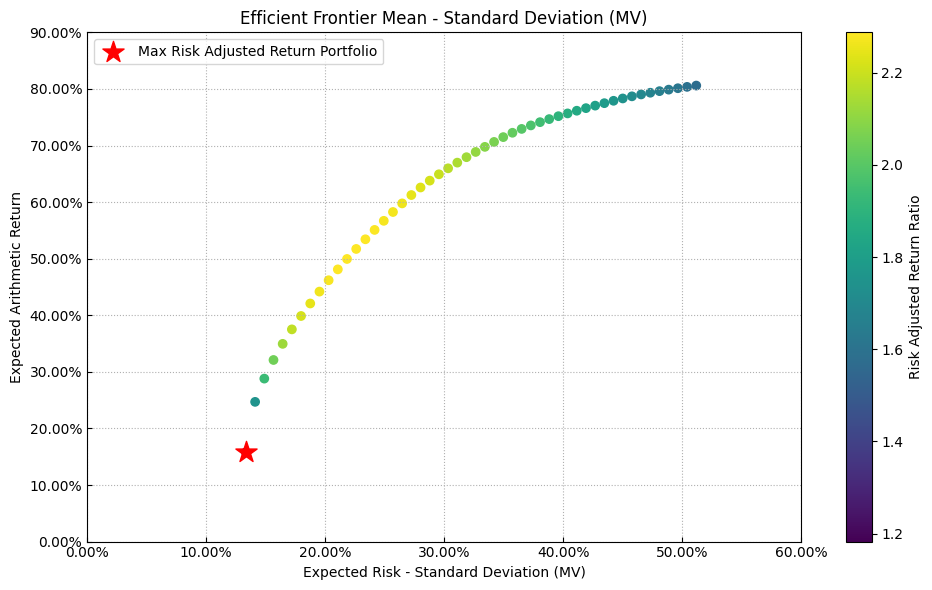

In [8]:
# Plotting frontier

points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
# display(frontier.T.tail())

# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_min_risk, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


In [9]:
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

In [10]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
TIMS3.SA,13.25%,10.62%,11.00%,8.38%,10.54%,7.56%,4.55%,0.00%,12.36%,14.31%,15.57%,16.05%,17.18%
VIVT3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.12%,0.00%,11.71%,3.50%,4.76%,3.32%,7.30%
SUZB3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,2.28%,0.00%,0.00%,0.01%
KLBN11.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CSAN3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
VBBR3.SA,17.49%,14.88%,18.93%,12.64%,16.49%,17.87%,14.07%,5.05%,25.20%,21.43%,27.70%,20.56%,27.29%
PRIO3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.81%,0.79%,0.00%,0.00%,0.00%,0.01%
UGPA3.SA,0.07%,0.66%,0.52%,0.00%,0.54%,2.23%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ENAT3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,10.09%,12.51%,0.00%,0.00%,0.00%,0.00%,0.00%
PETR3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.08%,0.03%,3.13%,0.00%,0.00%,0.00%,0.00%,0.03%
